## Importing Necessary Functions

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import argparse
import itertools as it
from matplotlib import rc


## Defining Constants

In [211]:
hbar = 1.05*10**(-27) # erg/sec
e = 4.8*10**(-10) #esu
m = 9.1*10**(-28) #g
c = 3*10**10 #cm/sec
kb = 1.3807*10**(-16) #cm^2 g s^-2 K-1 i.e. erg K^-1
h = 6.626*10**(-27)

## Resonance Radius

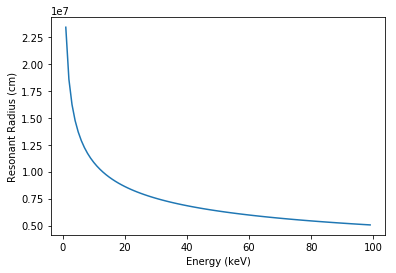

In [2]:
# function of epsilon
eps = np.array(range(1,100)) # in terms of KeV
B_NS = 10**15 #Guass 
r_NS = 10**6 #cm
b = B_NS/(4*10**(13))
r = 8*r_NS*b**(1/3)*(eps)**(-1/3)
plt.plot(eps, r)
plt.xlabel("Energy (keV)")
plt.ylabel("Resonant Radius (cm)")
#plt.savefig("resonanceRadiusEpsilon.png")

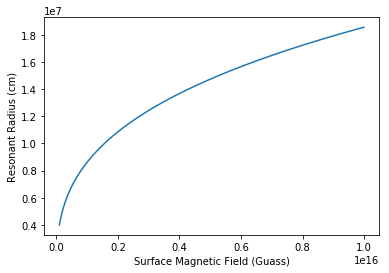

In [3]:
# function of B
eps = 20 # in terms of KeV
B_NS = np.array(range(10**14,10**16,10**13)) #Guass 
r_NS = 10**6 #cm 
b = B_NS/(4*10**(13))
r = 8*r_NS*b**(1/3)*(eps)**(-1/3)
plt.plot(B_NS, r)
plt.xlabel("Surface Magnetic Field (Guass)")
plt.ylabel("Resonant Radius (cm)")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#plt.savefig("resonanceRadiusEpsilon.png")

## Resonant Cross Section

2.7472527472527466e+19


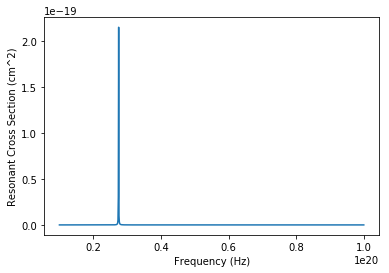

In [92]:
# function of frequency
eps = 20 
B_NS = 10**12 # Gauss 
r_NS = 10**6 #cm
b = B_NS/(4*10**(13))
r = 8*r_NS*b**(1/3)*(eps)**(-1/3)
B = B_NS*(r_NS/r)**3
#print(B)
omega = np.array(range(10**19, 10**20, 10**17)) # Hz
omega_sqr = ((omega/10**17)**2)*10**34
sig_T =6.65*10**(-25) #cm^2
omega_B = e*B/m/c # Hz
print(omega_B)
alpha = 1 # dimensionless
width = 4*e**2*omega_B**2/(3*m*c**3)
sig_res = sig_T/4*((1+np.cos(alpha)*np.cos(alpha))*omega_sqr)/((omega-omega_B)**2 )#+ 1/4*width**2)
plt.plot(omega, sig_res)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Resonant Cross Section (cm^2)")
#plt.savefig("resonanceCrossSectionFrequency.png")

Text(0,0.5,'Resonant Cross Section (cm^2)')

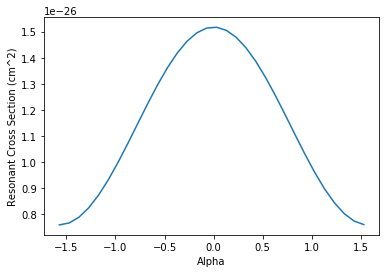

In [73]:
# function of alpha
eps = 20 
B_NS = 10**12 # Gauss 
r_NS = 10**6 #cm
b = B_NS/(4*10**(13))
r = 8*r_NS*b**(1/3)*(eps)**(-1/3)
B = B_NS*(r_NS/r)**3
omega = 4.8360*10**18
sig_T =6.65*10**(-25) #cm^2
omega_B = e*B/m/c # Hz
alpha = np.arange(-np.pi/2,np.pi/2,0.1) # dimensionless
width = 4*e**2*omega_B**2/(3*m*c**3)
sig_res = sig_T/4*((1+np.cos(alpha)*np.cos(alpha))*omega**2)/((omega-omega_B)**2 )#+ 1/4*width**2)
plt.plot(alpha, sig_res)
plt.xlabel("Alpha")
plt.ylabel("Resonant Cross Section (cm^2)")

## Ratio of Resonant Optical Depth to Thomson Optical Depth

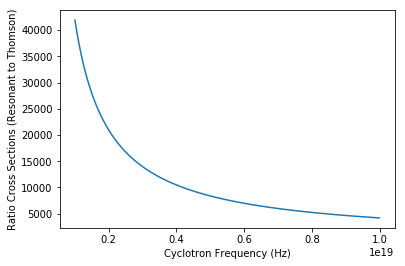

In [85]:
omega_B = np.arange(10**18,10**19,10**16)
r_e = e**2/(m*c**2)
ratio_taus = np.pi*c/(8*r_e*omega_B)
plt.plot(omega_B, ratio_taus)
plt.xlabel("Cyclotron Frequency (Hz)")
plt.ylabel("Ratio Cross Sections (Resonant to Thomson)")
#plt.savefig("ratioOpticalDepths.png")

## Water Bag Approximation for Optical Depth

In [234]:
beta = 0.1
eps = 20 # in terms of KeV
B_NS = 5*10**15 # Gauss 
r_NS = 10**4 # meters
b = B_NS/(4*10**(13))
r = 8*r_NS*b**(1/3)*(eps)**(-1/3)
B = B_NS # Gauss 
omega_B = e*B/(m*c) # Hz
n = 3*B/np.pi**2/e/r
tau_0 = (np.pi)**2*e**2*n*r/(3*m*c*omega_B)
tau = tau_0/(2*beta)

4.999999999999999


## Reflection Probability

Text(0,0.5,'Reflection Probability')

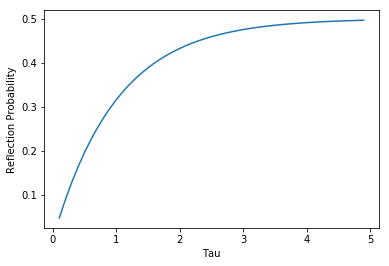

In [238]:
tau = np.arange(0.1,5,0.1)
p = (1-np.exp(-tau))/2
plt.plot(tau,p)
plt.xlabel("Tau")
plt.ylabel("Reflection Probability")

## Small Optical Depth

In [307]:
def delta(n):
    if n == 0:
        return 1
    else:
        return 0

1.7582417582417586e+19


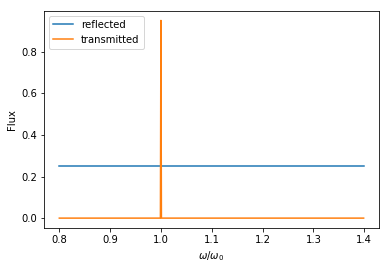

In [56]:
tau_0 = 0.1
beta_T = 0.1
eps = 20 # in terms of KeV
r_NS = 10**4 # meters
b = B_NS/(4*10**(13))
r = 8*r_NS*b**(1/3)*(eps)**(-1/3)
B = 10**12 # Gauss 
omega_B = e*B/(m*c) # Hz
omega_ratio = np.arange(0.8,1.4,0.001)
#print(omega_ratio)
omega = omega_B*omega_ratio
# initial x-ray photons
omega_0 = omega_B
print(omega_0)


delta_array =[]
for omega_ind in omega:
    #print(delta(omega_ind-omega_0))
    dif = omega_ind-omega_0
    if abs(dif) < 10**15:
        dif = 0
    delta_array.append(delta(dif))
    
n_trans = delta_array*(1-(tau_0/(4*beta_T*omega_0))*(omega-omega_0*(1-2*beta_T)))

# n_ref is n_minus
n_ref = np.full(len(omega_ratio),tau_0/(4*beta_T))
plt.plot(omega_ratio, n_ref, label = "reflected")
plt.plot(omega_ratio, n_trans, label = "transmitted")
plt.xlabel("$\omega / \omega_0$")
plt.ylabel("Flux")
plt.legend(loc="upper left")
#plt.savefig("fluxSmallOpticalDepth.png")

## Large Optical Depth

In [24]:
beta_T = 0.1
# thermal velocity ratio of the particles
eps = 20 # photon energy in keV
B_NS = 10**12 # magnetic field of NS (Gauss)
r_NS = 10**6 # radius of NS (cm)
b = B_NS/(4*10**(13))
B = B_NS # Gauss 
omega_B = e*B/(m*c) # cyclotron frequency
omega_ratio = np.arange(0.8,10.0,0.011)
omega = omega_B*omega_ratio
r = 8*r_NS*b**(1/3)*(eps)**(-1/3) # resonance radius
# initial x-ray photons
omega_0 = omega_B

In [ ]:
# I think omega_0 is supposed to be the initial frequency and
# omega is the frequency given by resonance

/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in power
  del sys.path[0]


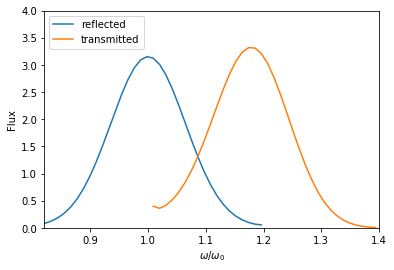

In [50]:
tau_0 = 20

# reflected flux
#n_
# equation is def missing a negative sign
n_ref = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*((1+2*beta_T-omega_ratio)*(omega_ratio-1+2*beta_T))**(-1/4)\
        * np.exp(-(omega-omega_0)**2*tau_0/(16*beta_T**2*omega_0**2))
#print(n_ref)
plt.plot(omega_ratio, n_ref, label = "reflected")


# transmitted flux
# n+
n_trans = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*(1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))

plt.plot(omega_ratio, n_trans, label = "transmitted")
plt.ylim(0,4)
plt.xlim(0.82,1.4)
plt.xlabel("$\omega / \omega_0$")
plt.ylabel("Flux")
plt.legend(loc="upper left")
plt.savefig("fluxLargeOpticalDepth20.png")

/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


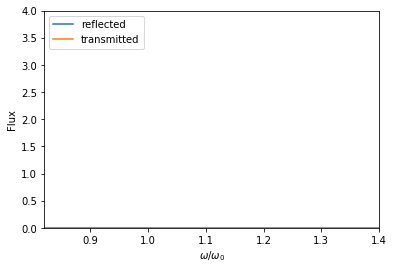

In [118]:
tau_0 = 10
# reflected flux
#n_
# equation is def missing a negative sign
n_ref = ((1+2*beta_T-omega_ratio)*(omega_ratio-1+2*beta_T))**(-1/4)\
        * np.exp(-(omega-omega_0)**2*tau_0/(16*beta_T**2*omega_0**2))
#print(n_ref)
plt.plot(omega_ratio, n_ref, label = "reflected")


# transmitted flux
# n+
n_trans = (1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))

plt.plot(omega_ratio, n_trans, label = "transmitted")
plt.ylim(0,4)
plt.xlim(0.82,1.4)
plt.xlabel("$\omega / \omega_0$")
plt.ylabel("Flux")
plt.legend(loc="upper left")
#plt.savefig("fluxLargeOpticalDepth10.png")


## Modelling a Planck Spectrum: Round one

In [ ]:
# In this round, I just arbitrarily make a Planck function and 
# muliply it by my transmission and reflection functions.
# This process is incorrect because the Planck function and transmission/
# reflection functions are for arbitary omega and are thus not
# correlated in the correct way. 

/Users/curtina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0.5,1,'Planck Function')

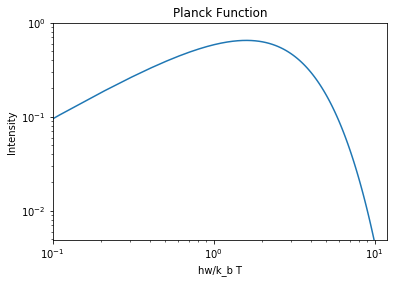

In [106]:
x_arr = np.arange(0.01,10,0.1)
I_x = x_arr**2*(1/(np.exp(x_arr)-1))
plt.plot(x_arr,I_x)
plt.xlabel("hw/k_b T")
plt.ylabel("Intensity")
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,12)
plt.ylim(0,1)
plt.title("Planck Function")

/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in power


0.8143375198382


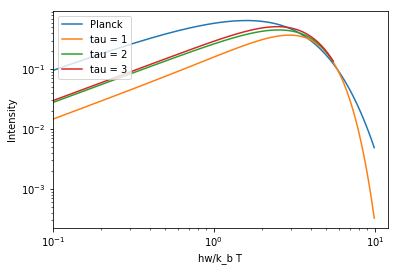

In [709]:
# Tau = 20
tau_0 = 20
beta_T = 0.3
beta = np.arange(-0.3,0.3,0.01)
gamma = 1/np.sqrt(1-beta**2)
# thermnal velocity ratio of the particles
eps = 2 # photon energy in keV
B_NS = 5*10**16 # magnetic field of NS (Gauss)
r_NS = 10**6 # radius of NS (cm)
b = B_NS/(4*10**(13))
B = B_NS # Gauss 
omega_B = e*B/(m*c) # cyclotron frequency
#omega_ratio = np.arange(0.8,2.0,0.012)
omega_ratio = np.arange(1.1,2.0,0.009)
omega = omega_B*omega_ratio
r = 8*r_NS*b**(1/3)*(eps)**(-1/3) # resonance radius
# initial x-ray photons
omega_0 = omega_B
n_trans_20 = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*(1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))


n_ref_20 = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*((1+2*beta_T-omega_ratio)*(omega_ratio-1+2*beta_T))**(-1/4)\
        * np.exp(-(omega-omega_0)**2*tau_0/(16*beta_T**2*omega_0**2)) 
        
spectra_20 = n_trans_20*I_x + \
             n_ref_20*I_x*n_trans_20 + \
             n_ref_20*I_x*n_trans_20*n_trans_20
        
spectra_20_1 = n_trans_20*I_x 
spectra_20_2 = n_trans_20*I_x + \
             n_ref_20*I_x*n_trans_20
spectra_20_3 = n_trans_20*I_x + \
             n_ref_20*I_x*n_trans_20 + \
             n_ref_20*I_x*n_trans_20*n_trans_20
#plt.plot(omega_ratio, n_trans)


plt.plot(x_arr,I_x,label='Planck')
plt.xlabel("hw/k_b T")
plt.ylabel("Intensity")
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,12)
#plt.ylim(0,10)
plt.plot(x_arr,spectra_20_1, label='tau = 1')
plt.plot(x_arr,spectra_20_2, label='tau = 2')
plt.plot(x_arr,spectra_20_3, label='tau = 3')
#plt.plot(x_arr,n_trans_01*I_x, label='tau = 0.1')
plt.legend(loc="upper left")

print(np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi))

In [703]:
# Tau = 30
tau_0 = 30
beta_T = 0.3
beta = np.arange(-0.3,0.3,0.01)
gamma = 1/np.sqrt(1-beta**2)
# thermnal velocity ratio of the particles
eps = 2 # photon energy in keV
B_NS = 5*10**16 # magnetic field of NS (Gauss)
r_NS = 10**6 # radius of NS (cm)
b = B_NS/(4*10**(13))
B = B_NS # Gauss 
omega_B = e*B/(m*c) # cyclotron frequency
#omega_ratio = np.arange(0.8,2.0,0.012)
omega_ratio = np.arange(1.1,2.0,0.009)
omega = omega_B*omega_ratio
r = 8*r_NS*b**(1/3)*(eps)**(-1/3) # resonance radius
# initial x-ray photons
omega_0 = omega_B
n_trans_30 = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*(1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))
        
        
n_ref_30 = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*((1+2*beta_T-omega_ratio)*(omega_ratio-1+2*beta_T))**(-1/4)\
           * np.exp(-(omega-omega_0)**2*tau_0/(16*beta_T**2*omega_0**2))

spectra_30 = n_trans_30*I_x + \
             n_ref_30*I_x*n_trans_30 + \
             n_ref_30*I_x*n_trans_30*n_trans_30

/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in power


In [705]:
# Tau = 0.1
tau_0 = 0.1
beta_T = 0.3
eps = 2 # in terms of KeV
B_NS = 5*10**15 # Gauss 
r_NS = 10**4 # meters
b = B_NS/(4*10**(13))
r = 8*r_NS*b**(1/3)*(eps)**(-1/3)
B = B_NS # Gauss 
omega_B = e*B/(m*c) # Hz
omega_ratio = np.arange(0.8,2.0,0.012)
print(len(omega_ratio))
omega = omega_B*omega_ratio
# initial x-ray photons
omega_0 = omega_B


delta_array =[]
for omega_ind in omega:
    #print(delta(omega_ind-omega_0))
    dif = omega_ind-omega_0
    if abs(dif) < 10**19:
        dif = 0
    delta_array.append(delta(dif))
    
n_trans_01 = delta_array*(1-(tau_0/(4*beta_T*omega_0))*(omega-omega_0*(1-2*beta_T)))



100


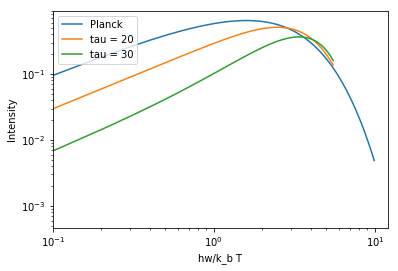

In [710]:
plt.plot(x_arr,I_x,label='Planck')
plt.xlabel("hw/k_b T")
plt.ylabel("Intensity")
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,12)
#plt.ylim(0,10)
plt.plot(x_arr,spectra_20, label='tau = 20')
plt.plot(x_arr,spectra_30, label='tau = 30')
#plt.plot(x_arr,n_trans_01*I_x, label='tau = 0.1')
plt.legend(loc="upper left")

## Second Round Adjusted Planck Spectrum

In [109]:
# General process to follow:
# Take the planck spectrum for a given omega_0 (i.e. that
# is the peak frequency of the spectrum) and multiply it
# by the transmission function for that omega_0 given
# and for a range of omega values that are determined by the
# dimensionless x-values. This process is still incorrect.

1.7582417582417586e+19
1.7582417582417586e+19


/Users/curtina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


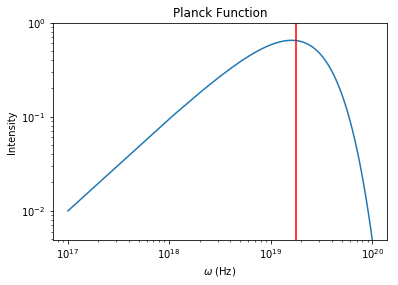

In [83]:
tau_0 = 20 # optical depth
beta_T = .3 # thermal velocity
B = 10**12 # magnetic field in the region of interest
r_NS = 10**6 # radius of NS (cm)
omega_B = e*B/(m*c)
omega_0 = omega_B
print(omega_0)
energy_0 = h*omega_0
T = energy_0/11/kb
print(omega_B)
#omega_arr = x_arr*kb/hbar
# determining the temperature from beta_T
#T = (beta_T*c)**2*m/kb
# the above temperature is incorrect so we just auto set the temperature
#T = 60000 # K
x_arr = np.arange(0.01,10,0.1)
I_x = x_arr**2*(1/(np.exp(x_arr)-1))
omega_arr = x_arr*kb*T/hbar
#omega_0 = 2.821*kb*T/(h) # erg
plt.plot(omega_arr,I_x)
plt.xlabel("$\omega$ (Hz)")
plt.ylabel("Intensity")
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,1)
plt.title("Planck Function")
plt.axvline(x=omega_B, c = 'r')

/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/Users/curtina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0.5,1,'Planck Function')

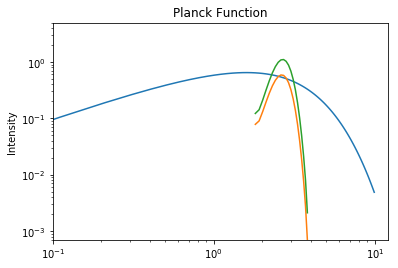

In [110]:
trans_fnct = []
ref_fnct = []
ratio = []
for omega in omega_arr:
    omega_ratio = omega/omega_0
    ratio.append(omega_ratio)
    #print(omega_ratio)
    n_trans_20 = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*(1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))
    trans_fnct.append(n_trans_20)
    n_ref_20 = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*((1+2*beta_T-omega_ratio)*(omega_ratio-1+2*beta_T))**(-1/4)\
        * np.exp(-(omega-omega_0)**2*tau_0/(16*beta_T**2*omega_0**2)) 
    ref_fnct.append(n_ref_20)

plt.plot(x_arr,I_x)
plt.plot(x_arr,I_x*trans_fnct)
plt.plot(x_arr,trans_fnct)
plt.ylabel("Intensity")
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,5)
plt.xlim(0.1,12)
plt.title("Planck Function")
#plt.axvline(x=omega_B, c = 'r')


## Third Round Adjusted Planck Spectrum

In [111]:
# General Process: Create a Planck spectrum over an arbitrary frequency range
# (but maybe in the x-rays). Find the value of the Planck spectrum
# for a given omega_0. Multiply this value by the transmission function.
# Append some large array with all of the transmission functions

/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in power
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in power
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in power
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in power
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in power
/Users/curtina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in power


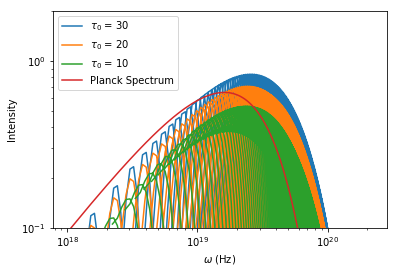

In [341]:
hbar = 1.05*10**(-27) # erg/sec
e = 4.8*10**(-10) #esu
m = 9.1*10**(-28) #g
c = 3*10**10 #cm/sec
kb = 1.3807*10**(-16) #cm^2 g s^-2 K-1 i.e. erg K^-1
h = 6.626*10**(-27)
beta_T = .3 # thermal velocity
B = 10**12 # magnetic field in the region of interest
r_NS = 10**6 # radius of NS (cm)
omega_B = e*B/(m*c)
energy_B = h*omega_B
T = energy_B/11/kb
x_arr = np.arange(0.1,10,0.05)
I_x = x_arr**2*(1/(np.exp(x_arr)-1))
omega_arr = x_arr*kb*T/hbar
# pick out a frequency from the planck spectrum
# length 100
omega_ratio = np.arange(0.8,10.0,0.1)

tau_0 = 30 # optical depth
for i, omega_i in enumerate(omega_arr):
    omega_0 = omega_i
    I = x_arr[i]**2*(1/(np.exp(x_arr[i])-1))
    omega = omega_0*omega_ratio
    n_trans = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*(1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))
    if i ==0:
        spectrum = n_trans*I
        freq = omega
    if i > 0:
        spectrum = np.append(spectrum, n_trans*I)
        freq = np.append(freq, omega)
plt.plot(freq, spectrum, label = "$\\tau_0$ = 30")
        
tau_0 = 20 # optical depth
for i, omega_i in enumerate(omega_arr):
    omega_0 = omega_i
    I = x_arr[i]**2*(1/(np.exp(x_arr[i])-1))
    omega = omega_0*omega_ratio
    n_trans = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*(1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))
    if i ==0:
        spectrum = n_trans*I
        freq = omega
    if i > 0:
        spectrum = np.append(spectrum, n_trans*I)
        freq = np.append(freq, omega)
plt.plot(freq, spectrum, label = "$\\tau_0$ = 20")
        
tau_0 = 10 # optical depth
for i, omega_i in enumerate(omega_arr):
    omega_0 = omega_i
    I = x_arr[i]**2*(1/(np.exp(x_arr[i])-1))
    omega = omega_0*omega_ratio
    n_trans = np.sqrt(tau_0/beta_T)/4/np.sqrt(2*np.pi)*(1+4*beta_T-omega_ratio)**(1/4) \
          *(omega_ratio-1)**(-3/4) \
          * np.exp(-(omega-omega_0*(1+2*beta_T))**2*tau_0/(16*beta_T**2*omega_0**2))
    if i ==0:
        spectrum = n_trans*I
        freq = omega
    if i > 0:
        spectrum = np.append(spectrum, n_trans*I)
        freq = np.append(freq, omega)
plt.plot(freq, spectrum, label = "$\\tau_0$ = 10")
        
        
plt.plot(omega_arr,I_x, label = "Planck Spectrum")
plt.ylabel("Intensity")
plt.xlabel("$\omega$ (Hz)")
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1,2)
plt.legend(loc="upper left")
plt.savefig("SpectrumLargeTau.png")

1.0086675229532376e+18
1.0036241853384719e+20


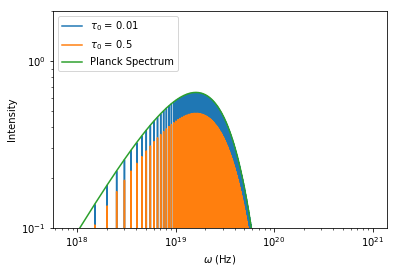

In [345]:
hbar = 1.05*10**(-27) # erg/sec
e = 4.8*10**(-10) #esu
m = 9.1*10**(-28) #g
c = 3*10**10 #cm/sec
kb = 1.3807*10**(-16) #cm^2 g s^-2 K-1 i.e. erg K^-1
h = 6.626*10**(-27)
beta_T = .3 # thermal velocity
B = 10**12 # magnetic field in the region of interest
r_NS = 10**6 # radius of NS (cm)
omega_B = e*B/(m*c)
energy_B = h*omega_B
T = energy_B/11/kb
x_arr = np.arange(0.1,10,0.05)
I_x = x_arr**2*(1/(np.exp(x_arr)-1))
omega_arr = x_arr*kb*T/hbar
# pick out a frequency from the planck spectrum
# length 100
omega_ratio = np.arange(0.8,10.0,0.1)
print(min(omega_arr))
print(max(omega_arr))
tau_0 = .01 # optical depth
for i, omega_i in enumerate(omega_arr):
    omega_0 = omega_i
    I = x_arr[i]**2*(1/(np.exp(x_arr[i])-1))
    omega = omega_0*omega_ratio
    delta_array =[]
    for omega_ind in omega:
        #print(delta(omega_ind-omega_0))
        dif = omega_ind-omega_0
        if abs(dif) < 10**15:
            dif = 0
        delta_array.append(delta(dif))
    
    n_trans = delta_array*(1-(tau_0/(4*beta_T*omega_0))*(omega-omega_0*(1-2*beta_T)))

    if i ==0:
            spectrum = n_trans*I
            freq = omega
    if i > 0:
            spectrum = np.append(spectrum, n_trans*I)
            freq = np.append(freq, omega)
plt.plot(freq, spectrum, label = "$\\tau_0$ = 0.01")

tau_0 = .5 # optical depth
for i, omega_i in enumerate(omega_arr):
    omega_0 = omega_i
    I = x_arr[i]**2*(1/(np.exp(x_arr[i])-1))
    omega = omega_0*omega_ratio
    delta_array =[]
    for omega_ind in omega:
        #print(delta(omega_ind-omega_0))
        dif = omega_ind-omega_0
        if abs(dif) < 10**15:
            dif = 0
        delta_array.append(delta(dif))
    
    n_trans = delta_array*(1-(tau_0/(4*beta_T*omega_0))*(omega-omega_0*(1-2*beta_T)))

    if i ==0:
            spectrum = n_trans*I
            freq = omega
    if i > 0:
            spectrum = np.append(spectrum, n_trans*I)
            freq = np.append(freq, omega)
plt.plot(freq, spectrum, label = "$\\tau_0$ = 0.5")

        
        
plt.plot(omega_arr,I_x, label = "Planck Spectrum")
plt.ylabel("Intensity")
plt.xlabel("$\omega$ (Hz)")
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1,2)
plt.legend(loc="upper left")
plt.savefig("SpectrumSmallTau.png")